<a href="https://colab.research.google.com/github/binarybottle/typing-data/blob/main/digraph_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Inter-key timings from: A. Iseri, M. Eksioglu. Intl Journal of Industrial Ergonomics 48 (2015) 127e138
#        Left:            Right:
#    1  4  7 10 13   16 19 22 25 28 30 32
#    2  5  8 11 14   17 20 23 26 29 31
#    3  6  9 12 15   18 21 24 27

interkey_timings32x32 = np.array([
    [196,266,357,225,258,325,204,231,263,164,166,186,155,163,196,179,174,169,169,156,171,176,156,175,178,158,177,186,163,185,189,196],
    [266,196,271,239,240,267,196,208,208,160,166,169,167,156,168,153,148,143,143,129,145,150,129,149,151,132,151,160,137,159,163,170],
    [357,271,196,289,245,236,237,201,194,165,160,161,164,167,160,181,176,171,171,157,173,178,157,177,179,160,179,188,164,187,191,198],
    [225,239,289,181,245,296,182,196,229,147,150,167,149,152,175,171,166,162,162,148,163,169,148,167,170,150,169,178,155,177,182,188],
    [258,240,245,245,181,256,194,183,184,161,149,150,151,153,153,147,142,138,138,124,139,145,124,144,146,126,145,154,131,153,158,164],
    [325,267,236,296,256,181,214,215,184,185,147,157,162,154,148,175,170,166,166,152,167,173,152,172,174,154,173,182,159,181,186,192],
    [204,196,237,182,194,214,170,232,263,149,155,166,149,147,171,166,162,157,157,143,158,164,143,163,165,145,164,173,150,172,177,184],
    [231,208,201,196,183,215,232,170,239,157,149,151,164,146,150,143,138,134,134,120,135,141,120,140,142,122,141,150,127,149,154,160],
    [263,208,194,229,184,184,263,239,170,234,170,150,248,161,149,169,164,159,159,145,161,166,145,165,167,148,167,176,153,175,179,186],
    [164,160,165,147,161,185,149,157,234,169,226,257,251,240,276,164,159,154,154,141,156,162,141,160,163,143,162,171,148,170,175,181],
    [166,166,160,150,149,147,155,149,170,226,169,221,235,231,254,142,138,133,133,119,135,140,119,139,141,122,141,150,126,149,153,160],
    [186,169,161,167,150,157,166,151,150,257,221,169,262,228,235,162,157,153,153,139,154,160,139,159,161,141,160,169,146,168,173,179],
    [155,167,164,149,151,162,149,164,248,251,235,262,169,221,255,167,163,158,158,144,159,165,144,164,166,146,165,175,151,173,178,185],
    [163,156,167,152,153,154,147,146,161,240,231,228,221,169,228,166,161,156,156,142,158,163,142,162,164,145,164,173,150,172,176,183],
    [196,168,160,175,153,148,171,150,149,276,254,235,255,228,169,174,170,165,165,151,166,172,151,171,173,153,172,182,158,181,185,192],
    [179,153,181,171,147,175,166,143,169,164,142,162,167,166,174,151,203,216,196,213,226,145,153,220,139,142,185,149,160,148,155,157],
    [174,148,176,166,142,170,162,138,164,159,138,157,163,161,170,203,151,200,191,201,218,144,147,188,149,153,148,154,148,146,150,155],
    [169,143,171,162,138,166,157,134,159,154,133,153,158,156,165,216,200,151,207,188,198,144,144,140,137,139,138,176,152,148,161,167],
    [169,143,171,162,138,166,157,134,159,154,133,153,158,156,165,196,191,207,151,188,213,147,151,204,141,142,162,145,164,145,149,154],
    [156,129,157,148,124,152,143,120,145,141,119,139,144,142,151,213,201,188,188,151,192,137,133,149,136,138,139,147,152,143,144,165],
    [171,145,173,163,139,167,158,135,161,156,135,154,159,158,166,226,218,198,213,192,151,149,145,140,155,145,142,164,160,175,145,151],
    [176,150,178,169,145,173,164,141,166,162,140,160,165,163,172,145,144,144,147,137,149,151,207,227,189,191,208,209,206,226,197,181],
    [156,129,157,148,124,152,143,120,145,141,119,139,144,142,151,153,147,144,151,133,145,207,151,204,188,179,183,206,183,194,201,213],
    [175,149,177,167,144,172,163,140,165,160,139,159,164,162,171,220,188,140,204,149,140,227,204,151,226,185,175,268,220,265,188,205],
    [178,151,179,170,146,174,165,142,167,163,141,161,166,164,173,139,149,137,141,136,155,189,188,226,157,210,239,253,231,225,276,254],
    [158,132,160,150,126,154,145,122,148,143,122,141,146,145,153,142,153,139,142,138,145,191,179,185,210,157,208,251,240,235,229,273],
    [177,151,179,169,145,173,164,141,167,162,141,160,165,164,172,185,148,138,162,139,142,208,183,175,239,208,157,362,293,265,230,279],
    [186,160,188,178,154,182,173,150,176,171,150,169,175,173,182,149,154,176,145,147,164,209,206,268,253,251,362,170,233,236,271,291],
    [163,137,164,155,131,159,150,127,153,148,126,146,151,150,158,160,148,152,164,152,160,206,183,220,231,240,293,233,170,230,242,260],
    [185,159,187,177,153,181,172,149,175,170,149,168,173,172,181,148,146,148,145,143,175,226,194,265,225,235,265,236,230,170,230,245],
    [189,163,191,182,158,186,177,154,179,175,153,173,178,176,185,155,150,161,149,144,145,197,201,188,276,229,230,271,242,230,170,226],
    [196,170,198,188,164,192,184,160,186,181,160,179,185,183,192,157,155,167,154,165,151,181,213,205,254,273,279,291,260,245,226,170]])

# Extract pairwise entries for the 32 vertical range keys:
#        Left:            Right:
#    1  2  3  4 25   28 13 14 15 16 31
#    5  6  7  8 26   29 17 18 19 20 32
#    9 10 11 12 27   30 21 22 23 24
#
# A. Iseri, M. Eksioglu. Intl Journal of Industrial Ergonomics 48 (2015) 127e138
#        Left:            Right:
#    1  4  7 10 13   16 19 22 25 28 30 32
#    2  5  8 11 14   17 20 23 26 29 31
#    3  6  9 12 15   18 21 24 27

# The above paper is missing key 24 in the upper layout,
# so repeat 29, then remove below:
map_table_to_engram_32keys = [ 1, 4, 7,10,  2, 5, 8,11,  3, 6, 9,12,
                              19,22,25,28, 20,23,26,29, 21,24,27,     1000,
                                 13,14,15,    16,17,18,       30,31]
left_keys = [1,2,3,4,25, 5,6,7,8,26, 9,10,11,12,27]
right_keys = [28,13,14,15,16, 29,17,18,19,20, 30,21,22,23,24, 31,32]

Time32x32 = np.zeros((32,32))
u = 0
for i in map_table_to_engram_32keys:
    u += 1
    v = 0

    # Remove key 24:
    if i != 1000:

      for j in map_table_to_engram_32keys:
          v += 1

          # Remove key 24:
          if j != 1000:

            if u in left_keys and v in left_keys:
                Time32x32[u-1,v-1] = interkey_timings32x32[i-1,j-1]
            elif u in right_keys and v in right_keys:
                Time32x32[u-1,v-1] = interkey_timings32x32[i-1,j-1]


In [ ]:
# Normalize matrix with min-max scaling to a range of 0 to 1 (and change no_value to 0):
no_value = np.min(interkey_timings32x32) - 1
Time32x32_copy = np.copy(Time32x32)
Time32x32_copy[Time32x32 == 0] = no_value
newMin = np.min(Time32x32_copy) / np.max(Time32x32_copy)
newMax = 1.0
Time32x32_norm = newMin + (Time32x32_copy - np.min(Time32x32_copy)) * (newMax - newMin) / (np.max(Time32x32_copy) - np.min(Time32x32_copy))
Time32x32_norm[Time32x32 == 0] = 0

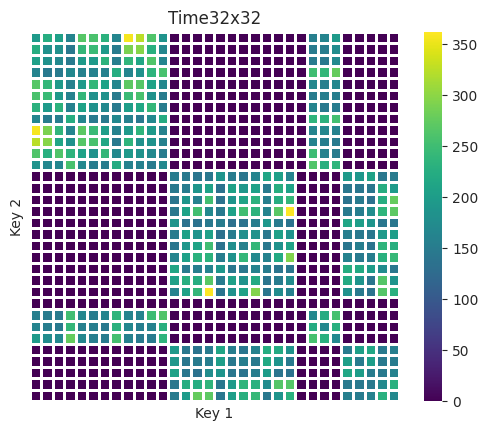

In [ ]:
# Create a heatmap of the typing time matrix.

def heatmap(data, title="", xlabel="", ylabel="", x_axis_labels=[], y_axis_labels=[], print_output=True):
    """
    Plot heatmap of matrix.
    """
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    plt.figure()
    sns_plot = sns.heatmap(data, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=1,
                           cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns_plot.set_xticklabels(x_axis_labels)  #, rotation=75)
    sns_plot.set_yticklabels(y_axis_labels)
    if print_output:
        sns_plot.figure.savefig("{0}_heatmap.png".format(title))


heatmap(data=Time32x32, title="Time32x32", xlabel="Key 1", ylabel="Key 2")

In [ ]:
# Create a csv table of key locations and another table of times.
#
#        Left:            Right:
#    1  2  3  4 25   28 13 14 15 16 31
#    5  6  7  8 26   29 17 18 19 20 32
#    9 10 11 12 27   30 21 22 23 24

# Key locations bottom row to top row and left to right:
# Unique ID, QWERTY letter at key location, row (3 top, 1 bottom), column (1 leftmost, 11 rightmost)
# key_locations = [id,name,lat,lon
# 1,q,1,1
# ...]
'''
key_32_grid_locations = [id,name,lat,lon
1,q,3,1
2,w,3,2
3,e,3,3
4,r,3,4
5,a,2,1
6,s,2,2
7,d,2,3
8,f,2,4
9,z,1,1
10,x,1,2
11,c,1,3
12,v,1,4
13,u,3,7
14,i,3,8
15,o,3,9
16,p,3,10
17,j,2,7
18,k,2,8
19,l,2,9
20,";",2,10
21,m,1,7
22,",",1,8
23,".",1,9
24,"/",1,10
25,t,3,5
26,g,2,5
27,b,1,5
28,y,3,6
29,h,2,6
30,n,1,6
31,"[",3,11
32,"'",2,11]
'''

# Key locations staggered so that arrow overlays do not overlap each other:
# Unique ID, QWERTY letter at key location
# key_locations = [id,name,lat,lon
# 1,q,1,1
# ...]

#    1  2  3  4 25   28 13 14 15 16 31
#    5  6  7  8 26   29 17 18 19 20 32
#    9 10 11 12 27   30 21 22 23 24

'''
key_32_staggered_locations = [id,name,lat,lon
1,  q,   30, 10
2,  w,   32, 14
3,  e,   32, 18
4,  r,   30, 22
5,  a,   20,  8
6,  s,   22, 16
7,  d,   22, 20
8,  f,   20, 24
9,  z,   10, 10
10, x,   12, 14
11, c,   12, 18
12, v,   10, 22
13, u,   30, 44
14, i,   32, 48
15, o,   32, 52
16, p,   30, 56
17, j,   20, 42
18, k,   22, 46
19, l,   22, 50
20, semicolon, 20, 58
21, m,   10, 44
22, comma, 12, 48
23, period, 12, 52
24, slash, 10, 56
25, t,   26, 28
26, g,   16, 30
27, b,    6, 28
28, y,   26, 38
29, h,   16, 36
30, n,    6, 38
31, bracket, 26, 62
32, apostrophe, 16, 64
]
'''

# Key pair times:
# origin key ID, destination key ID, time
# key_pair_times = [origin,dest,count
# 1,2,6
# ...]
key_pair_times = ['origin','dest','count']
u = 0
for i in range(32):
    u += 1
    v = 0
    for j in range(32):
        v += 1
        if Time32x32[u-1,v-1] > 0:
          key_pair_times.append([u,v,Time32x32[u-1,v-1]])

# unidirectional:
key_pair_times_1way = ['origin','dest','count']
u = 0
for i in range(32):
    u += 1
    v = i + 1
    for j in range(v,32):
        v += 1
        if Time32x32[u-1,v-1] > 0:
          key_pair_times_1way.append([u,v,Time32x32[u-1,v-1]])

# normed:
key_pair_times_norm = ['origin','dest','count']
u = 0
for i in range(32):
    u += 1
    v = 0
    for j in range(32):
        v += 1
        if Time32x32_norm[u-1,v-1] > 0:
          key_pair_times_norm.append([u,v,Time32x32_norm[u-1,v-1]])

# normed & unidirectional:
key_pair_times_norm_1way = ['origin','dest','count']
u = 0
for i in range(32):
    u += 1
    v = i + 1
    for j in range(v,32):
        v += 1
        if Time32x32_norm[u-1,v-1] > 0:
          key_pair_times_norm_1way.append([u,v,Time32x32_norm[u-1,v-1]])


In [ ]:
for x in key_pair_times:
  print("{0},{1},{2}".format(x[0],x[1],x[2]))

o,r,i
d,e,s
c,o,u
1,1,196.0
1,2,225.0
1,3,204.0
1,4,164.0
1,5,266.0
1,6,258.0
1,7,231.0
1,8,166.0
1,9,357.0
1,10,325.0
1,11,263.0
1,12,186.0
1,25,155.0
1,26,163.0
1,27,196.0
2,1,225.0
2,2,181.0
2,3,182.0
2,4,147.0
2,5,239.0
2,6,245.0
2,7,196.0
2,8,150.0
2,9,289.0
2,10,296.0
2,11,229.0
2,12,167.0
2,25,149.0
2,26,152.0
2,27,175.0
3,1,204.0
3,2,182.0
3,3,170.0
3,4,149.0
3,5,196.0
3,6,194.0
3,7,232.0
3,8,155.0
3,9,237.0
3,10,214.0
3,11,263.0
3,12,166.0
3,25,149.0
3,26,147.0
3,27,171.0
4,1,164.0
4,2,147.0
4,3,149.0
4,4,169.0
4,5,160.0
4,6,161.0
4,7,157.0
4,8,226.0
4,9,165.0
4,10,185.0
4,11,234.0
4,12,257.0
4,25,251.0
4,26,240.0
4,27,276.0
5,1,266.0
5,2,239.0
5,3,196.0
5,4,160.0
5,5,196.0
5,6,240.0
5,7,208.0
5,8,166.0
5,9,271.0
5,10,267.0
5,11,208.0
5,12,169.0
5,25,167.0
5,26,156.0
5,27,168.0
6,1,258.0
6,2,245.0
6,3,194.0
6,4,161.0
6,5,240.0
6,6,181.0
6,7,183.0
6,8,149.0
6,9,245.0
6,10,256.0
6,11,184.0
6,12,150.0
6,25,151.0
6,26,153.0
6,27,153.0
7,1,231.0
7,2,196.0
7,3,232.0
7,4,157.0
7,5,20

In [ ]:
for x in key_pair_times_1way:
  print("{0},{1},{2}".format(x[0],x[1],x[2]))

o,r,i
d,e,s
c,o,u
1,2,225.0
1,3,204.0
1,4,164.0
1,5,266.0
1,6,258.0
1,7,231.0
1,8,166.0
1,9,357.0
1,10,325.0
1,11,263.0
1,12,186.0
1,25,155.0
1,26,163.0
1,27,196.0
2,3,182.0
2,4,147.0
2,5,239.0
2,6,245.0
2,7,196.0
2,8,150.0
2,9,289.0
2,10,296.0
2,11,229.0
2,12,167.0
2,25,149.0
2,26,152.0
2,27,175.0
3,4,149.0
3,5,196.0
3,6,194.0
3,7,232.0
3,8,155.0
3,9,237.0
3,10,214.0
3,11,263.0
3,12,166.0
3,25,149.0
3,26,147.0
3,27,171.0
4,5,160.0
4,6,161.0
4,7,157.0
4,8,226.0
4,9,165.0
4,10,185.0
4,11,234.0
4,12,257.0
4,25,251.0
4,26,240.0
4,27,276.0
5,6,240.0
5,7,208.0
5,8,166.0
5,9,271.0
5,10,267.0
5,11,208.0
5,12,169.0
5,25,167.0
5,26,156.0
5,27,168.0
6,7,183.0
6,8,149.0
6,9,245.0
6,10,256.0
6,11,184.0
6,12,150.0
6,25,151.0
6,26,153.0
6,27,153.0
7,8,149.0
7,9,201.0
7,10,215.0
7,11,239.0
7,12,151.0
7,25,164.0
7,26,146.0
7,27,150.0
8,9,160.0
8,10,147.0
8,11,170.0
8,12,221.0
8,25,235.0
8,26,231.0
8,27,254.0
9,10,236.0
9,11,194.0
9,12,161.0
9,25,164.0
9,26,167.0
9,27,160.0
10,11,184.0
10,12,157.0
10,2